In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
with open('amazon-meta.txt') as txt:
     lines = [line.strip().strip() for line in txt]

In [3]:
newlines = ['break' if x=='' else x for x in lines]
newlines = newlines[3:]

In [4]:
data = pd.DataFrame(newlines,columns=['all'])
data['idcount'] = 0
data.loc[data['all']=='break','idcount'] = 1
data['count'] = data['idcount'].cumsum()
data.head()

,all,idcount,count
0,Id: 0,0,0
1,ASIN: 0771044445,0,0
2,discontinued product,0,0
3,break,1,1
4,Id: 1,0,1


In [5]:
txt = data['all']
ide = [x.strip('Id: ') for x in txt if x[0:4] == 'Id: ']
ASIN = [x.strip('ASIN: ') for x in txt if x[0:4] == 'ASIN']
title = [x.strip('title: ') for x in txt if (x[0:5] == 'title')|(x[0:5] == 'disco')]
group = [x.strip('group: ') for x in txt if (x[0:5] == 'group')|(x[0:5] == 'disco')]
salesrank = [x.strip('salesrank: ') for x in txt if (x[0:5] == 'sales')|(x[0:5] == 'disco')]
similar = [x.strip('similar: ') for x in txt if (x[0:5] == 'simil')|(x[0:5] == 'disco')]
categories = [x.strip('categories: ') for x in txt if (x[0:5] == 'categ')|(x[0:5] == 'disco')]
reviews = [x.strip('reviews: ') for x in txt if (x[0:5] == 'revie')|(x[0:5] == 'disco')]
allcats = [x for x in txt if (x[0] == '|')]
allreviews = [x for x in txt if (x[0:3] == '200')]


In [6]:
df = pd.DataFrame()
df['Id'] = ide
df['ASIN'] = ASIN
df['title'] = title
df['group'] = group
df['salesrank'] = salesrank
df['categories'] = categories
df['reviews'] = reviews

print('done')

#reviews
reviewsplit = df['reviews'].str.split(':| ',expand=True)
df['reviewtotal'] = reviewsplit[2]
df['reviewdl'] = reviewsplit[6]
df['reviewrat'] = reviewsplit[11]
del df['reviews']

#type
ints = ['salesrank','categories','reviewtotal','reviewdl','reviewrat']
for a in ints:
    cond1 = df[a] == 'discontinued product'
    cond2 = df[a] == 'discontinued produc'
    cond3 = df[a] == 'discontinued produ'
    cond4 = df[a].isnull()
    df.loc[cond1|cond2|cond3|cond4,a] = 0
    if a == 'reviewrat':
        df[a] = df[a].astype(float)
    else:
        df[a] = df[a].astype(int)

done


In [7]:
print(df.shape)
df.head()

(548552, 9)


,Id,ASIN,title,group,salesrank,categories,reviewtotal,reviewdl,reviewrat
0,0,0771044445,discontinued produc,discontinued product,0,0,0,0,0.0
1,1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,396585,2,2,2,5.0
2,2,0738700797,Candlemas: Feast of Flames,Book,168596,2,12,12,4.5
3,3,0486287785,World War II Allied Fighter Planes Trading Cards,Book,1270652,1,1,1,5.0
4,4,0842328327,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289,5,1,1,4.0


In [8]:
catlist = []
revlist = []
count = 0
revcount = 0
for a in np.arange(0,548552):
    numberofcats = df.loc[a,'categories']
    thelist = allcats[count:count+numberofcats]
    catlist.append(thelist)
    count += numberofcats
    #reviews
    numberofrevs = df.loc[a,'reviewtotal']
    reviewlist = allreviews[revcount:revcount+numberofrevs]
    revlist.append(reviewlist)
    revcount += numberofrevs

In [9]:
df['cats'] = catlist
df['reviews'] = revlist
df.head()

,Id,ASIN,title,group,salesrank,categories,reviewtotal,reviewdl,reviewrat,cats,reviews
0,0,0771044445,discontinued produc,discontinued product,0,0,0,0,0.0,[],[]
1,1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,396585,2,2,2,5.0,[|Books[283155]|Subjects[1000]|Religion & Spir...,[2000-7-28 cutomer: A2JW67OY8U6HHK rating: 5...
2,2,0738700797,Candlemas: Feast of Flames,Book,168596,2,12,12,4.5,[|Books[283155]|Subjects[1000]|Religion & Spir...,[2001-12-16 cutomer: A11NCO6YTE4BTJ rating: ...
3,3,0486287785,World War II Allied Fighter Planes Trading Cards,Book,1270652,1,1,1,5.0,[|Books[283155]|Subjects[1000]|Home & Garden[4...,[2003-7-10 cutomer: A3IDGASRQAW8B2 rating: 5...
4,4,0842328327,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289,5,1,1,4.0,[|Books[283155]|Subjects[1000]|Religion & Spir...,[2004-8-19 cutomer: A2591BUPXCS705 rating: 4...


### A. (Suggested duration: 90 mins) With the given data for 548552 products, perform exploratory analysis and make suggestions for further analysis on the following aspects.

#1. Trustworthiness of ratings
Ratings are susceptible to manipulation, bias etc. What can you say (quantitatively
speaking) about the ratings in this dataset?




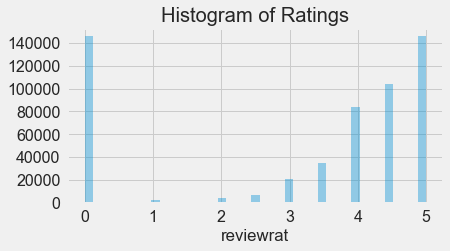

In [10]:
x = df['reviewrat']
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(6,3))
sns.distplot(x,kde=False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Histogram of Ratings')

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 <a list of 8 Text yticklabel objects>)

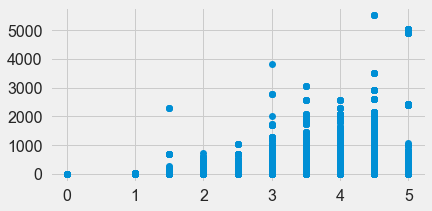

In [11]:
fig = plt.figure(figsize=(6,3))
x = df['reviewrat']
y = df['reviewtotal']
ax = plt.subplot(111)
ax.plot(x,y,'o')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [90]:
df

,Id,ASIN,title,group,salesrank,categories,reviewtotal,reviewdl,reviewrat,cats,reviews
0,0,0771044445,discontinued produc,discontinued product,0,0,0,0,0.0,[],[]
1,1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,396585,2,2,2,5.0,[|Books[283155]|Subjects[1000]|Religion & Spir...,[2000-7-28 cutomer: A2JW67OY8U6HHK rating: 5...
2,2,0738700797,Candlemas: Feast of Flames,Book,168596,2,12,12,4.5,[|Books[283155]|Subjects[1000]|Religion & Spir...,[2001-12-16 cutomer: A11NCO6YTE4BTJ rating: ...
3,3,0486287785,World War II Allied Fighter Planes Trading Cards,Book,1270652,1,1,1,5.0,[|Books[283155]|Subjects[1000]|Home & Garden[4...,[2003-7-10 cutomer: A3IDGASRQAW8B2 rating: 5...
4,4,0842328327,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289,5,1,1,4.0,[|Books[283155]|Subjects[1000]|Religion & Spir...,[2004-8-19 cutomer: A2591BUPXCS705 rating: 4...
5,5,1577943082,Prayers That Avail Much for Business: Executiv,Book,455160,2,0,0,0.0,[|Books[283155]|Subjects[1000]|Religion & Spir...,[]
6,6,0486220125,How the Other Half Lives: Studies Among the Te...,Book,188784,5,17,17,4.0,[|Books[283155]|Subjects[1000]|Arts & Photogra...,[2000-1-4 cutomer: AJYG6ZJUQPZ9M rating: 4 ...
7,7,B00000AU3R,Batik,Music,5392,3,3,3,4.5,[|Music[5174]|Styles[301668]|Jazz[34]|General[...,[2000-10-31 cutomer: A2F1X6YFCJZ1FH rating: ...
8,8,0231118597,Losing Matt Shepard,Book,277409,4,15,15,4.5,[|Books[283155]|Subjects[1000]|Gay & Lesbian[3...,[2001-4-16 cutomer: AVFBIM1W41IXO rating: 1...
9,9,1859677800,Making Bread: The Taste of Traditional Home-Ba...,Book,949166,1,0,0,0.0,"[|Books[283155]|Subjects[1000]|Cooking, Food &...",[]


## Most ratings are a 0 or a 5.  Not very many people rate 1, 2, or 3

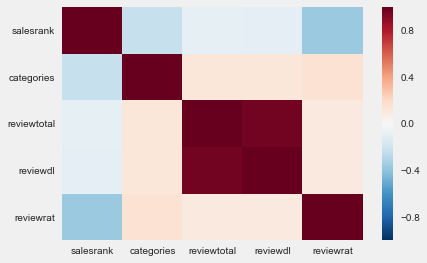

In [35]:
cor = df.corr()
sns.heatmap(cor)

## As review rating goes up, salesrank goes down.  This is to be expected

## Data quality issue that some products have a salesrank of -1
<br>
<br><br>

#2. Category bloat
Consider the product group named 'Books'. Each product in this group is associated with
categories. Naturally, with categorization, there are tradeoffs between how broad or
specific the categories must be.
For this dataset, quantify the following:
- a. Is there redundancy in the categorization? How can it be identified/removed?
- b. Is is possible to reduce the number of categories drastically (say to 10% of existing categories) by sacrificing relatively few category entries (say close to 10%)?


In [ ]:
#A.
books = [df.loc[a] for a in np.arange(0,len(df)) if 'Books' in df.loc[a]]

In [99]:
def filterer(string):
    thelist = []
    for a in np.arange(0,len(df)):
        theitem = df.loc[a,'cats']
        for b in np.arange(0,len(theitem)):
            if string in df.loc[a,'cats'][b]:
                thelist.append(df.loc[a,'Id'])
    return thelist

In [102]:
import time
start = time.time()

Books = filterer('Books')


end = time.time()
print(end - start)

37.017565965652466


In [118]:
bookdf = pd.DataFrame(Books)
bookidlist = bookdf[0].astype(int).unique()
df.loc[bookidlist]

,Id,ASIN,title,group,salesrank,categories,reviewtotal,reviewdl,reviewrat,cats,reviews
1,1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,396585,2,2,2,5.0,[|Books[283155]|Subjects[1000]|Religion & Spir...,[2000-7-28 cutomer: A2JW67OY8U6HHK rating: 5...
2,2,0738700797,Candlemas: Feast of Flames,Book,168596,2,12,12,4.5,[|Books[283155]|Subjects[1000]|Religion & Spir...,[2001-12-16 cutomer: A11NCO6YTE4BTJ rating: ...
3,3,0486287785,World War II Allied Fighter Planes Trading Cards,Book,1270652,1,1,1,5.0,[|Books[283155]|Subjects[1000]|Home & Garden[4...,[2003-7-10 cutomer: A3IDGASRQAW8B2 rating: 5...
4,4,0842328327,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289,5,1,1,4.0,[|Books[283155]|Subjects[1000]|Religion & Spir...,[2004-8-19 cutomer: A2591BUPXCS705 rating: 4...
5,5,1577943082,Prayers That Avail Much for Business: Executiv,Book,455160,2,0,0,0.0,[|Books[283155]|Subjects[1000]|Religion & Spir...,[]
6,6,0486220125,How the Other Half Lives: Studies Among the Te...,Book,188784,5,17,17,4.0,[|Books[283155]|Subjects[1000]|Arts & Photogra...,[2000-1-4 cutomer: AJYG6ZJUQPZ9M rating: 4 ...
8,8,0231118597,Losing Matt Shepard,Book,277409,4,15,15,4.5,[|Books[283155]|Subjects[1000]|Gay & Lesbian[3...,[2001-4-16 cutomer: AVFBIM1W41IXO rating: 1...
9,9,1859677800,Making Bread: The Taste of Traditional Home-Ba...,Book,949166,1,0,0,0.0,"[|Books[283155]|Subjects[1000]|Cooking, Food &...",[]
10,10,0375709363,The Edward Said Reader,Book,220379,3,6,6,4.0,[|Books[283155]|Subjects[1000]|Literature & Fi...,[2002-1-26 cutomer: A280GY5UVUS2QH rating: 3...
11,11,0871318237,Resetting the Clock : Five Anti-Aging Hormones...,Book,412962,4,1,1,5.0,"[|Books[283155]|Subjects[1000]|Health, Mind & ...",[2004-7-5 cutomer: A1RNV50D6DNE42 rating: 1 ...


## 376,455 out of the 548,552 are books (68.6%)
## This is too broad of a category.  The broader categories should be removed

## To find the exact percentages of how much we would be able to reduce categories, further unsupervised learning analysis would need to be done
<br>
<br>
<br>

### B. (Suggested duration: 30 mins) Give the number crunching a rest! Just think about these problems.

#1. Algorithm thinking
How would build the product categorization from scratch, using similar/co-purchased
information?

## set thresholds for both minimum and maximum number of items for each category to 5% of total number of items.
## this will help ensure that categories are not too broad, and not too specific.

#2. Product thinking
Now, put on your 'product thinking' hat.
- a. Is it a good idea to show users the categorization hierarchy for items?
    - ** Yes.  This will help customers direct themselves to the products they desire. **
- b. Is it a good idea to show users similar/co-purchased items?
    - ** Yes.  If customers see items that are similar, they are more likely to purchase them. **
- c. Is it a good idea to show users reviews and ratings for items?
    - ** Yes and no.  This could either encourage or discourage the customer from making a purchase (depending on
    the rating).  Overall, we think that Yes, the positives will outweigh the negatives. **
- d. For each of the above, why? How will you establish the same?
    - ** Already answered above **